In [ ]:
 from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeavePOut


In [ ]:
col_names_edge = ['Source', 'Target']
col_names_node=['Names']
pima_edge = pd.read_csv("/content/drive/MyDrive/Graph_Processing/Dat_edge_list.csv", header=None, names=col_names_edge)
pima_node = pd.read_csv("/content/drive/MyDrive/Graph_Processing/Dat_node_list.csv", header=None, names=col_names_node)
print("Edge List")
pima_edge.head()

Edge List


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [ ]:
print("Node List")
pima_node.head()

Node List


,Names
0,Joseph Wyeth
1,Alexander Skene of Newtyle
2,James Logan
3,Dorcas Erbery
4,Lilias Skene


In [ ]:
pima_edge=pima_edge.to_numpy()
pima_node=pima_node.to_numpy()

In [ ]:
a,b=pima_node.shape
Node_Id=np.arange(1,a+1)



A,B=pima_edge.shape
Edge_Id=np.zeros([A,B])

for i in range(A):
  result1=np.where(pima_node == pima_edge[i,0])
  Edge_Id[i,0] = result1[0]+1
  result2=np.where(pima_node == pima_edge[i,1])
  Edge_Id[i,1] = result2[0]+1

print("Sample Edge List")
print(Edge_Id[0:10,:])


Edge_Id_new=np.zeros([A+10,B])
Edge_Id_new_2=np.zeros([A+5,B])

Edge_Id_new[0:A,:]=np.copy(Edge_Id)



Sample Edge List
[[ 67.  52.]
 [ 67.  42.]
 [ 67.  79.]
 [ 67.  70.]
 [ 67. 107.]
 [ 67.  16.]
 [ 67.  39.]
 [ 67.  11.]
 [ 68.  42.]
 [ 68.  26.]]


In [ ]:
# x=np.random.randint(1,5,(1,2))
# y=np.copy(x)
# y[0]=10
# print(y)
for i in range(A+1,A+10):
  x=np.random.randint(1,119,2)
  for ith in range(Edge_Id.shape[0]):
    if (x[0]!=Edge_Id[ith,0] and x[1]!=Edge_Id[ith,1]) or (x[1]!=Edge_Id[ith,0] and x[0]!=Edge_Id[ith,1]):
      Edge_Id_new[i,:]=x




In [ ]:
x

array([[37, 95]])

In [ ]:
def num_common_elements(a, b):
  a.sort()
  b.sort()
  i, j = 0, 0
  common = []
  while i < len(a) and j < len(b):
    if a[i] == b[j]:
      common.append(a[i])
      i += 1
      j += 1
    elif a[i] < b[j]:
      i += 1
    else:
      j += 1
  return len(common)

In [ ]:
J_Matrix=np.zeros([a,a])
J_Matrix_new=np.zeros([a,a])
J_Matrix_new_2=np.zeros([a,a])
X_Matrix=np.zeros([a,a])
X_Matrix_new=np.zeros([a,a])
X_Matrix_new_2=np.zeros([a,a])

np.random.randint(2, size=10)
for i in range(a):
  for j in range(a):
    resulti=np.where(Edge_Id == Node_Id[i])
    resultj=np.where(Edge_Id == Node_Id[j])
    Set_i=Edge_Id[resulti[0],1-resulti[1]]
    Set_j=Edge_Id[resultj[0],1-resultj[1]]
    J_Matrix[i,j]=num_common_elements(Set_i, Set_j)
    X_Matrix[i,j]=num_common_elements(Set_i, Set_j)

for i in range(a):
  for j in range(a):
    resulti=np.where(Edge_Id_new == Node_Id[i])
    resultj=np.where(Edge_Id_new == Node_Id[j])
    Set_i=Edge_Id_new[resulti[0],1-resulti[1]]
    Set_j=Edge_Id_new[resultj[0],1-resultj[1]]
    J_Matrix_new[i,j]=num_common_elements(Set_i, Set_j)
    X_Matrix_new[i,j]=num_common_elements(Set_i, Set_j)


for i in range(a):
  for j in range(a):
    resulti=np.where(Edge_Id_new_2 == Node_Id[i])
    resultj=np.where(Edge_Id_new_2 == Node_Id[j])
    Set_i=Edge_Id_new[resulti[0],1-resulti[1]]
    Set_j=Edge_Id_new[resultj[0],1-resultj[1]]
    J_Matrix_new_2[i,j]=num_common_elements(Set_i, Set_j)
    X_Matrix_new_2[i,j]=num_common_elements(Set_i, Set_j)




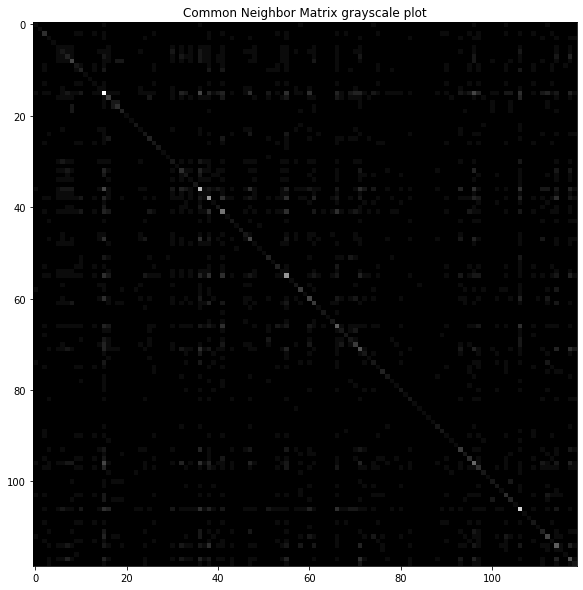

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from random import randrange

cv2.normalize(X_Matrix, X_Matrix, 0, 255, cv2.NORM_MINMAX, -1)
plt.figure(figsize=(10,10))
plt.title("Common Neighbor Matrix grayscale plot" )
plt.imshow(X_Matrix,cmap=plt.get_cmap('gray'))

In [ ]:
bal=np.array([0,1])
yal=bal
yal[0]=1
print(bal)

[1 1]


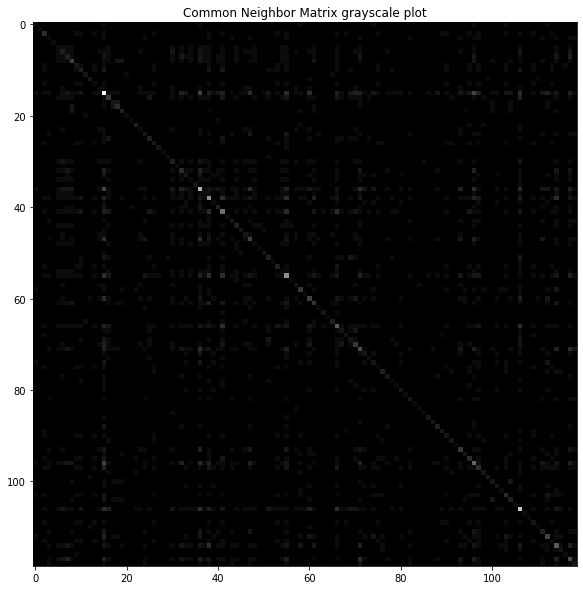

In [ ]:

cv2.normalize(X_Matrix_new, X_Matrix_new, 0, 255, cv2.NORM_MINMAX, -1)
plt.figure(figsize=(10,10))
plt.title("Common Neighbor Matrix grayscale plot" )
plt.imshow(X_Matrix_new,cmap=plt.get_cmap('gray'))

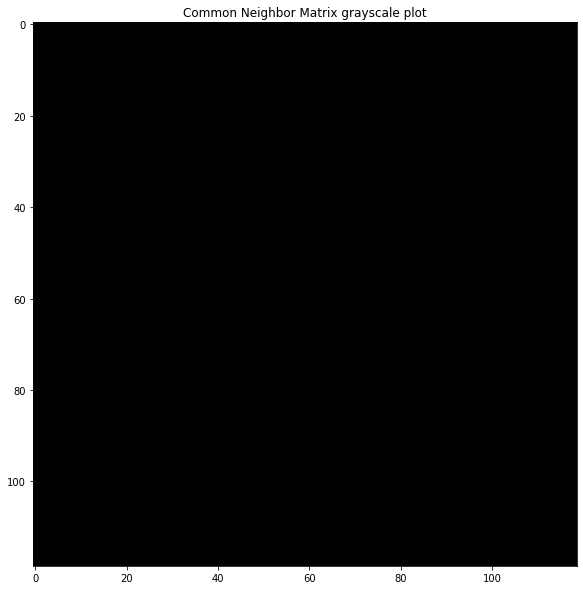

In [ ]:

cv2.normalize(X_Matrix_new_2, X_Matrix_new_2, 0, 255, cv2.NORM_MINMAX, -1)
plt.figure(figsize=(10,10))
plt.title("Common Neighbor Matrix grayscale plot" )
plt.imshow(X_Matrix_new_2,cmap=plt.get_cmap('gray'))

In [ ]:
Label_Matrix=np.zeros([a,a])
for i in range(a):
  for j in range(a):
    for ind in range(A):
      if (Node_Id[i]==Edge_Id[ind,0] and Node_Id[j]==Edge_Id[ind,1]) or (Node_Id[i]==Edge_Id[ind,1] and Node_Id[j]==Edge_Id[ind,0]):
        Label_Matrix[i,j]=1
        break





In [ ]:
import numpy as np
np.random.randint(1,5, size=(2, 4))

array([[3, 3, 1, 1],
       [2, 2, 2, 2]])

In [ ]:
print("Sample Label Matrix")
print(Label_Matrix[0:10,0:10])

Sample Label Matrix
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# Data_X=J_Matrix.flatten()
Data_Y=Label_Matrix.flatten()
Data_X=J_Matrix_new.flatten()

print(Data_X.shape)

(14161,)


Epoch 1/150
949/949 [==============================] - 2s 2ms/step - loss: 0.4219 - accuracy: 0.9748 - val_loss: 0.1117 - val_accuracy: 0.9767
Epoch 2/150
949/949 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9736 - val_loss: 0.0989 - val_accuracy: 0.9767
Epoch 3/150
949/949 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9752 - val_loss: 0.0957 - val_accuracy: 0.9767
Epoch 4/150
949/949 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9744 - val_loss: 0.0950 - val_accuracy: 0.9767
Epoch 5/150
949/949 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9734 - val_loss: 0.0948 - val_accuracy: 0.9767
Epoch 6/150
949/949 [==============================] - 1s 1ms/step - loss: 0.0950 - accuracy: 0.9779 - val_loss: 0.0948 - val_accuracy: 0.9767
Epoch 7/150
949/949 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9759 - val_loss: 0.0948 - val_accuracy: 0.9767

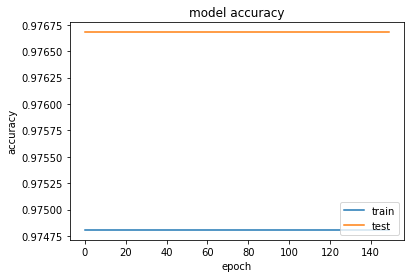

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


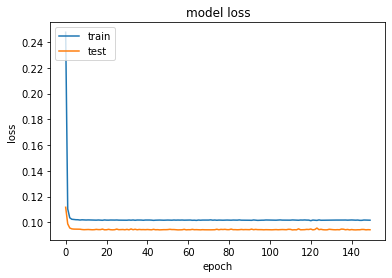

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
model = Sequential()
model.add(Dense(12, input_dim=1, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

history= model.fit(Data_X.reshape(-1, 1), Data_Y, validation_split=0.33, epochs=150, batch_size=10)

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y)
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)

history=clf.fit(X_train.reshape(-1, 1),y_train)
# Compile model
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy' ])
plt.title( 'model accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'model loss' )
plt.ylabel( 'loss' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
# MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
#               solver='lbfgs')

AttributeError: ignored

In [ ]:
y_pred = model.predict([10])
print(y_pred)

[[0.34390575]]


In [ ]:
  P=precision_score(y_test, y_pred, average='weighted')
  P2=recall_score(y_test, y_pred, average='weighted')
  P3=metrics.accuracy_score(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("********************************************************************")
print("\n\n\nPrecision:",P)
print("\n\n\nRecall:",P2)
print("\n\n\nAccuracy:",P3)
print("********************************************************************")

********************************************************************



Precision: 0.9421221418744125



Recall: 0.970629765602937



Accuracy: 0.970629765602937
********************************************************************


Identify Node list

In [ ]:
import numpy as np
a = pima_edge
X=np.unique(a)
X.shape

(119,)

Reinforcement learning based Classification

In [ ]:
class ContextBandit:
  def __init__(self, arms=J_Matrix.shape[0]):
    self.arms = arms
    self.init_distribution(arms)
    self.update_state()
  def init_distribution(self, arms):
    self.bandit_matrix = J_Matrix
    return self.bandit_matrix

  def reward(self, prob):
    reward = 0
    for i in range(self.arms):
      if random.random() < prob:
        reward += 1
    return reward
  def get_state(self):
    return self.state

  def update_state(self):
    self.state = np.random.randint(0,self.arms)
  def get_reward(self,arm):
    return self.reward(self.bandit_matrix[self.get_state()][arm])
  def choose_arm(self, arm):
    reward = self.get_reward(arm)
    self.update_state()
    return reward

In [ ]:
a,b=pima_node.shape
env = ContextBandit(arms=a)

In [ ]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import torch as th
n = 10
probs = np.random.rand(n)
eps = 0.2




state = env.get_state()
reward = env.choose_arm(100)

print(state)
print(reward)

46
0


In [ ]:
from torch.autograd import Variable



def softmax(av, tau=1.12):
    n = len(av)
    probs = np.zeros(n)
    for i in range(n):
        softm = ( np.exp(av[i] / tau) / np.sum( np.exp(av[:] / tau) ) )
        probs[i] = softm
    return probs

def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec

arms = J_Matrix.shape[0]
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1, arms, 100, arms

model = th.nn.Sequential(
    th.nn.Linear(D_in, H),
    th.nn.ReLU(),
    th.nn.Linear(H, D_out),
    th.nn.ReLU(),
)

loss_fn = th.nn.MSELoss(size_average=False)

env = ContextBandit(arms)

def train(env):
    epochs = 5000
    #one-hot encode current state
    cur_state = Variable(th.Tensor(one_hot(arms,env.get_state())))
    reward_hist = np.zeros(50)
    reward_hist[:] = 5
    runningMean = np.average(reward_hist)
    learning_rate = 1e-2
    optimizer = th.optim.Adam(model.parameters(), lr=learning_rate)
    plt.xlabel("Plays")
    plt.ylabel("Mean Reward")
    for i in range(epochs):
        y_pred = model(cur_state) #produce reward predictions
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) #turn reward distribution into probability distribution
        av_softmax /= av_softmax.sum() #make sure total prob adds to 1
        choice = np.random.choice(arms, p=av_softmax) #sample an action
        cur_reward = env.choose_arm(choice)
        one_hot_reward = y_pred.data.numpy().copy()
        one_hot_reward[choice] = cur_reward
        reward = Variable(th.Tensor(one_hot_reward))
        loss = loss_fn(y_pred, reward)
        if i % 50 == 0:
            runningMean = np.average(reward_hist)
            reward_hist[:] = 0
            plt.scatter(i, runningMean)
        reward_hist[i % 50] = cur_reward
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
        cur_state = Variable(th.Tensor(one_hot(arms,env.get_state())))

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


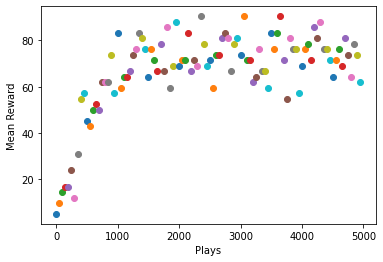

In [ ]:
train(env)

In [ ]:
arms=119
state=env.get_state()
cur_state = Variable(th.Tensor(one_hot(arms,state)))
y_pred = model(cur_state) 
av_softmax = softmax(y_pred.data.numpy(), tau=2.0) #turn reward distribution into probability distribution
av_softmax /= av_softmax.sum() #make sure total prob adds to 1

print("Deduced:", np.unravel_index(av_softmax.argmax(), av_softmax.shape))
print("State: ",state)


for n in range(Edge_Id.shape[0]):
  if (state==Edge_Id[n,0] ) or (state==Edge_Id[n,1]):
    print(Edge_Id[n,:])


Deduced: (97,)
State:  13
[13. 12.]


In [ ]:
env.get_state()

13

In [ ]:
np.unravel_index(cur_state.argmax(), cur_state.shape)

(100,)

In [ ]:
tester=np.array([20,node_target[1]])
for n in range(Edge_Id.shape[0]):
  if (119==Edge_Id[n,0] ) or (119==Edge_Id[n,1]):
    print(Edge_Id[n,:])

[112. 119.]
[ 37. 119.]


In [ ]:
class Blob:
    def __init__(self):
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)

    def __str__(self):
        return f"{self.x}, {self.y}"

    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)

    def action(self, choice):
        if choice == 0:
          self.move(x=0, y=1)
        for i in range(SIZE-1):
          if choice == i+1:
            self.move(x=0, y=i+1)
            break
        # elif choice == 2:
        #     self.move(x=-1, y=1)
        # elif choice == 3:
        #     self.move(x=1, y=-1)

    def move(self, x=False, y=False):

        # If no value for x, move randomly
        if not x:
            self.x += np.random.randint(-1, 2)
        else:
            self.x += x

        # If no value for y, move randomly
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y


        # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE-1:
            self.x = SIZE-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE-1:
            self.y = SIZE-1

In [ ]:

SIZE = 119

HM_EPISODES = 25000
MOVE_PENALTY = 1
ENEMY_PENALTY = 300
FOOD_REWARD = 25
epsilon = 0.9
EPS_DECAY = 0.9998  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 3000  # how often to play through env visually.

start_q_table = None # None or Filename

LEARNING_RATE = 0.1
DISCOUNT = 0.95


q_table=J_Matrix

X_enemy=[]
Y_enemy=[]
X_food=[]
Y_food=[]
a,b=J_Matrix.shape
for i in range(a):
  for j in range(b):
    if J_Matrix[i,j]==0:
      X_enemy.append(i)
      Y_enemy.append(j)
    else:
      X_food.append(i)
      Y_food.append(j)



episode_rewards = []

for episode in range(HM_EPISODES):
    player = Blob()
    food = Blob()
    enemy = Blob()
    
    


    if episode % SHOW_EVERY == 0:
        print(f"on #{episode}, epsilon is {epsilon}")
        print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
        show = True
    else:
        show = False

    episode_reward = 0
    for i in range(J_Matrix.shape[0]):
        obs = i
        #print(obs)
        if np.random.random() > epsilon:
            # GET THE ACTION
            action = np.argmax(q_table[obs])
        else:
            action = np.random.randint(0, J_Matrix.shape[0])
        # Take the action!
        player.action(action)

        #### MAYBE ###
        #enemy.move()
        #food.move()
        ##############



        enemy.x=random.choice(X_enemy)
        enemy.y=random.choice(Y_enemy)
        food.x=random.choice(X_food)
        food.y=random.choice(Y_food)

        if player.x == enemy.x and player.y == enemy.y:
            reward = -ENEMY_PENALTY
        elif player.x == food.x and player.y == food.y:
            reward = FOOD_REWARD
        else:
            reward = -MOVE_PENALTY
        ## NOW WE KNOW THE REWARD, LET'S CALC YO
        # first we need to obs immediately after the move.
        new_obs = (player-food, player-enemy)
        max_future_q = np.max(q_table[new_obs])
        current_q = q_table[obs][action]

        if reward == FOOD_REWARD:
            new_q = FOOD_REWARD
        else:
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        q_table[obs][action] = new_q

        

        episode_reward += reward
        if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:
            break

    #print(episode_reward)
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DECAY

on #0, epsilon is 0.9
3000 ep mean: nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


on #3000, epsilon is 0.49390083359356435
3000 ep mean: -120.91333333333333
on #6000, epsilon is 0.27104225936046566
3000 ep mean: -119.97633333333333
on #9000, epsilon is 0.14874221981913022
3000 ep mean: -120.41733333333333
on #12000, epsilon is 0.08162656262136181
3000 ep mean: -120.41066666666667
on #15000, epsilon is 0.044794919246742226
3000 ep mean: -119.48633333333333
on #18000, epsilon is 0.024582497729691496
3000 ep mean: -119.803
on #21000, epsilon is 0.01349035124500733
3000 ep mean: -120.172
on #24000, epsilon is 0.0074032174726434705
3000 ep mean: -120.15166666666667


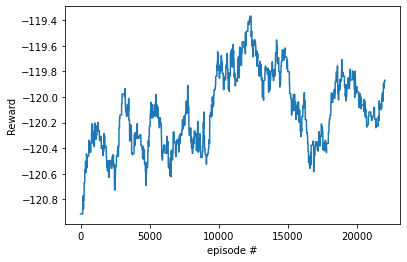

In [ ]:
moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward")
plt.xlabel("episode #")
plt.show()

In [ ]:
R=q_table[2,:]
np.unravel_index(R.argmax(), R.shape)

(76,)

In [ ]:
for n in range(Edge_Id.shape[0]):
  if (2==Edge_Id[n,0] ) or (2==Edge_Id[n,1]):
    print(Edge_Id[n,:])

[2. 5.]


In [ ]:

!pip install tensorflow==2.3.0
!pip install gym
!pip install keras
!pip install keras-rl2

     |████████████████████████████████| 320.4MB 33kB/s 
     |████████████████████████████████| 20.1MB 1.5MB/s 
     |████████████████████████████████| 460kB 43.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


     |████████████████████████████████| 61kB 3.4MB/s 


In [ ]:
from gym import Env
from gym.spaces import Discrete, Box
import math

In [ ]:
class ShowerEnv(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(J_Matrix.shape[0])
        # Temperature array
        # self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.observation_space =  Box(low=np.array([0]), high=np.array([J_Matrix.shape[0]]),dtype=np.int)
        # Set start temp
        self.state = math.ceil(J_Matrix.shape[0]/2) + random.randint(math.ceil(-J_Matrix.shape[0]/2),math.ceil(J_Matrix.shape[0]/2))
        # Set shower length
        self.shower_length = J_Matrix.shape[0]
        
    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0 
        # 2 -1 = 1 temperature 
        temp_state=self.state
        self.state = action
        # Reduce shower length by 1 second
        self.shower_length -= 1 
        
        # Calculate reward
        if J_Matrix[math.ceil(temp_state),math.ceil(self.state)] >=1: 
            reward =1 
        else: 
            reward = -1 
        
        # Check if shower is done
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        
        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        # Return step information
        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass
    
    def reset(self):
        # Reset shower temperature
        self.state = math.ceil(J_Matrix.shape[0]/2) 
        # Reset shower time
        self.shower_length =J_Matrix.shape[0]
        return self.state


In [ ]:
env = ShowerEnv()

In [ ]:
states = env.observation_space.shape
actions = env.action_space.n


print(states)
print(actions)

(1,)
119


In [ ]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

states = env.observation_space.shape
actions = env.action_space.n


def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(24, activation='relu', input_shape=states))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model



model = build_model(states, actions)


from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory



def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn


dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)




Training for 50000 steps ...
Interval 1 (0 steps performed)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  self._assert_weights_created()


    1/10000 [..............................] - ETA: 37:45 - reward: -1.0000

/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 85s 8ms/step - reward: 0.9972
84 episodes - episode_reward: 118.667 [95.000, 119.000] - loss: 10.415 - mae: 7.754 - mean_q: 43.608

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 84s 8ms/step - reward: 0.8000
84 episodes - episode_reward: 95.238 [-21.000, 119.000] - loss: 12.632 - mae: 7.926 - mean_q: 54.590

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 86s 9ms/step - reward: 0.7994
84 episodes - episode_reward: 95.095 [55.000, 115.000] - loss: 14.416 - mae: 7.794 - mean_q: 58.763

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 89s 9ms/step - reward: 0.6642
84 episodes - episode_reward: 79.095 [39.000, 111.000] - loss: 14.522 - mae: 7.301 - mean_q: 58.838

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 90s 9ms/step - reward: 0.6772
done, took 434.165 seconds


In [ ]:
scores = dqn.test(env,action_repetition=20, nb_episodes=10, visualize=False)
# print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...
Episode 1: reward: 117.000, steps: 6
Episode 2: reward: 117.000, steps: 6
Episode 3: reward: 117.000, steps: 6
Episode 4: reward: 117.000, steps: 6
Episode 5: reward: 117.000, steps: 6
Episode 6: reward: 117.000, steps: 6
Episode 7: reward: 117.000, steps: 6
Episode 8: reward: 117.000, steps: 6
Episode 9: reward: 117.000, steps: 6
Episode 10: reward: 117.000, steps: 6


In [ ]:
model.predict(np.array([3]))

array([[ 6.4011824e-01, -3.7539902e+00, -3.5495815e+00,  6.6914620e+00,
         2.2168548e+00,  3.9429252e+00, -6.1114378e-02, -6.1534228e+00,
         1.0700976e+00, -8.4546393e-01,  3.5291841e+00,  6.0226574e+01,
         2.0101763e-01,  2.1039088e+00, -2.1707470e+00,  7.0299935e+00,
         1.2168533e+00,  3.2722678e+00, -5.8955159e+00, -2.9047239e-01,
        -1.5710063e+00,  2.3145445e-03,  2.6709194e+00, -3.0984962e+00,
         4.7329125e-01, -2.9605248e+00, -3.6874897e+00,  2.2084286e+00,
         1.9983829e+00,  6.1347263e+01, -3.8080473e+00,  1.4007711e+00,
         5.0088143e+00,  8.3684969e-01,  1.8354416e+00, -4.3053970e+00,
        -6.9707551e+00,  3.7946859e-01,  6.1890377e+01,  2.8048153e+00,
         5.3937473e+00,  4.3880415e+00,  2.8781028e+00, -2.1153168e-01,
         6.3359637e+00,  3.2426438e-01, -1.6321762e+00,  1.8886795e+00,
        -3.0147982e+00, -2.2287655e+00,  3.0821595e+00,  1.9529444e+00,
        -9.7485560e-01,  3.0205498e+00,  1.4318889e+00,  1.37502

In [ ]:
from scipy.special import softmax
y_pred=model.predict(np.array([100]))
av_softmax = softmax(y_pred) #turn reward distribution into probability distribution
av_softmax /= av_softmax.sum() #make sure total prob adds to 1
node_target=np.unravel_index(av_softmax.argmax(), av_softmax.shape)
print("Candidate Node: ",node_target[1])

Candidate Node:  58


In [ ]:
for n in range(Edge_Id.shape[0]):
  if (100==Edge_Id[n,0] ) or (100==Edge_Id[n,1]):
    print(Edge_Id[n,:])

[ 21. 100.]


In [ ]:
K=av_softmax.argsort()

In [ ]:
for i in range(119):
  print(K[:,-i-1])

[58]
[112]
[38]
[29]
[11]
[24]
[105]
[117]
[17]
[79]
[101]
[12]
[3]
[15]
[94]
[44]
[51]
[14]
[102]
[32]
[77]
[4]
[40]
[89]
[19]
[53]
[43]
[6]
[13]
[111]
[70]
[34]
[103]
[69]
[35]
[52]
[50]
[39]
[42]
[108]
[106]
[107]
[31]
[10]
[0]
[64]
[27]
[100]
[37]
[76]
[63]
[116]
[22]
[80]
[104]
[90]
[55]
[74]
[16]
[114]
[41]
[23]
[92]
[72]
[21]
[61]
[56]
[66]
[57]
[65]
[86]
[84]
[33]
[62]
[26]
[91]
[45]
[83]
[7]
[71]
[96]
[87]
[113]
[73]
[5]
[47]
[25]
[95]
[30]
[81]
[46]
[20]
[110]
[115]
[78]
[85]
[97]
[118]
[8]
[36]
[93]
[109]
[59]
[88]
[1]
[54]
[48]
[68]
[9]
[49]
[28]
[82]
[2]
[60]
[18]
[75]
[98]
[99]
[67]


In [ ]:

for n in range(Edge_Id.shape[0]):
  if (2==Edge_Id[n,0] ) or (2==Edge_Id[n,1]):
    print(Edge_Id[n,:])

[2. 5.]


In [ ]:
R=av_softmax[0,:]

Q-Learning based Novelty

In [ ]:
class ShowerEnv(Env):
    def __init__(self):
        # Actions we can take, down, stay, up
        self.action_space = Discrete(J_Matrix.shape[0])
        # Temperature array
        # self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.observation_space =  Box(low=np.array([0]), high=np.array([J_Matrix.shape[0]]),dtype=np.int)
        # Set start temp
        self.state = math.ceil(J_Matrix.shape[0]/2) + random.randint(math.ceil(-J_Matrix.shape[0]/2),math.ceil(J_Matrix.shape[0]/2))
        # Set shower length
        self.shower_length = J_Matrix.shape[0]
        
    def step(self, action):
        # Apply action
        # 0 -1 = -1 temperature
        # 1 -1 = 0 
        # 2 -1 = 1 temperature 
        temp_state=self.state
        self.state = action
        # Reduce shower length by 1 second
        self.shower_length -= 1 
        
        # Calculate reward
        if J_Matrix[math.ceil(temp_state),math.ceil(self.state)] >=1: 
            reward =1 
        else: 
            reward = -1 
        
        # Check if shower is done
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        
        # Apply temperature noise
        #self.state += random.randint(-1,1)
        # Set placeholder for info
        info = {}
        
        # Return step information
        return self.state, reward, done, info
    def render(self):
        # Implement viz
        pass
    
    def reset(self):
        # Reset shower temperature
        self.state = math.ceil(J_Matrix.shape[0]/2) 
        # Reset shower time
        self.shower_length =J_Matrix.shape[0]
        return self.state

In [ ]:
class Blob:
    def __init__(self):
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)

    def __str__(self):
        return f"{self.x}, {self.y}"

    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)

    def action(self, choice):
        if choice == 0:
          self.move(x=0, y=1)
        for i in range(SIZE-1):
          if choice == i+1:
            self.move(x=0, y=i+1)
            break
        # elif choice == 2:
        #     self.move(x=-1, y=1)
        # elif choice == 3:
        #     self.move(x=1, y=-1)

    def move(self, x=False, y=False):

        # If no value for x, move randomly
        if not x:
            self.x += np.random.randint(-1, 2)
        else:
            self.x += x

        # If no value for y, move randomly
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y


        # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE-1:
            self.x = SIZE-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE-1:
            self.y = SIZE-1

In [ ]:
SIZE = 119

HM_EPISODES = 25000
MOVE_PENALTY = 1
ENEMY_PENALTY = 300
FOOD_REWARD = 25
epsilon = 0.9
EPS_DECAY = 0.9998  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 3000  # how often to play through env visually.

start_q_table = None # None or Filename

LEARNING_RATE = 0.1
DISCOUNT = 0.95


q_table=J_Matrix

X_enemy=[]
Y_enemy=[]
X_food=[]
Y_food=[]
a,b=J_Matrix.shape
for i in range(a):
  for j in range(b):
    if J_Matrix[i,j]==0:
      X_enemy.append(i)
      Y_enemy.append(j)
    else:
      X_food.append(i)
      Y_food.append(j)



episode_rewards = []

for episode in range(HM_EPISODES):
    player = Blob()
    food = Blob()
    enemy = Blob()
    
    


    if episode % SHOW_EVERY == 0:
        print(f"on #{episode}, epsilon is {epsilon}")
        print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
        show = True
    else:
        show = False

    episode_reward = 0
    for i in range(J_Matrix.shape[0]):
        obs = i
        #print(obs)
        if np.random.random() > epsilon:
            # GET THE ACTION
            action = np.argmax(q_table[obs])
        else:
            action = np.random.randint(0, J_Matrix.shape[0])
        # Take the action!
        player.action(action)

        #### MAYBE ###
        #enemy.move()
        #food.move()
        ##############



        enemy.x=random.choice(X_enemy)
        enemy.y=random.choice(Y_enemy)
        food.x=random.choice(X_food)
        food.y=random.choice(Y_food)

        if player.x == enemy.x and player.y == enemy.y:
            reward = -ENEMY_PENALTY
        elif player.x == food.x and player.y == food.y:
            reward = FOOD_REWARD
        else:
            reward = -MOVE_PENALTY
        ## NOW WE KNOW THE REWARD, LET'S CALC YO
        # first we need to obs immediately after the move.
        new_obs = (player-food, player-enemy)
        max_future_q = np.max(q_table[new_obs])
        current_q = q_table[obs][action]

        if reward == FOOD_REWARD:
            new_q = FOOD_REWARD
        else:
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
        q_table[obs][action] = new_q

        

        episode_reward += reward
        if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:
            break

    #print(episode_reward)
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DECAY